In [3]:
!pip install requests-oauthlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 151.7/151.7 kB 1.3 MB/s eta 0:00:00a 0:00:01


In [12]:
import os
os.environ['OAUTHLIB_INSECURE_TRANSPORT'] = '1'


In [18]:
from requests_oauthlib import OAuth2Session

# Your credentials
client_id='86693dab-f7c4-448e-8fce-af6b4e5b929d'
client_secret='0440cc1f0a10a2ef9eefdeeb7f2c1deaa489ec57aa9494a38c1826252bddda7f'
redirect_uri='http://localhost:8000/redirect.html'


In [63]:
### Initialize OAuth2 session
all_scopes = ["read:profile", "read:recovery", "read:workout", "read:sleep", "read:body_measurement", "read:cycles"]  # Add all available scopes here
oauth = OAuth2Session(client_id, scope=all_scopes, redirect_uri=redirect_uri)

# Get authorization URL
authorization_url, state = oauth.authorization_url('https://api.prod.whoop.com/oauth/oauth2/auth')

# Print generated state for debugging
print(f"Generated state: {state}")

# Navigate to authorization URL and get authorization code
print(f"Please go to this URL and authorize the app: {authorization_url}")
authorization_response = input('Enter the full callback URL: ')

# Extract state from callback URL for debugging
import urllib.parse
parsed_url = urllib.parse.urlparse(authorization_response)
returned_state = urllib.parse.parse_qs(parsed_url.query)['state'][0]
returned_code = urllib.parse.parse_qs(parsed_url.query)['code'][0]

print(f"Returned state: {returned_state}")
print(f"Returned code: {returned_code}")

Generated state: KnJREDmEb134UrDRU3UP6CD9tl4FRq
Please go to this URL and authorize the app: https://api.prod.whoop.com/oauth/oauth2/auth?response_type=code&client_id=86693dab-f7c4-448e-8fce-af6b4e5b929d&redirect_uri=http%3A%2F%2Flocalhost%3A8000%2Fredirect.html&scope=read%3Aprofile+read%3Arecovery+read%3Aworkout+read%3Asleep+read%3Abody_measurement+read%3Acycles&state=KnJREDmEb134UrDRU3UP6CD9tl4FRq


Enter the full callback URL:  http://localhost:8000/redirect.html?code=O2wlNI7Y2NjyqB7PlSh3LCvMtZ8JNWfAWw2ZV3PgwiQ.-qJfzEyMBNwi6jGS2aJ__6dWVwjy9l8rl9X0tChjOy8&scope=read%3Aprofile%20read%3Arecovery%20read%3Aworkout%20read%3Asleep%20read%3Abody_measurement%20read%3Acycles&state=KnJREDmEb134UrDRU3UP6CD9tl4FRq


Returned state: KnJREDmEb134UrDRU3UP6CD9tl4FRq
Returned code: O2wlNI7Y2NjyqB7PlSh3LCvMtZ8JNWfAWw2ZV3PgwiQ.-qJfzEyMBNwi6jGS2aJ__6dWVwjy9l8rl9X0tChjOy8


## manually extract Authorization Code to get Access Token 

In [64]:
import requests

token_url = 'https://api.prod.whoop.com/oauth/oauth2/token'
payload = {
    'grant_type': 'authorization_code',
    'code': returned_code,  # Replace with the code you extracted
    'redirect_uri': 'http://localhost:8000/redirect.html',
    'client_id': client_id,
    'client_secret': client_secret
}

response = requests.post(token_url, data=payload)
token_info = response.json()


In [65]:
print("Status Code:", response.status_code)


Status Code: 200


In [66]:
print("Response Text:", response.text)


Response Text: {"access_token":"lK_eCg0nRxPXSURTvWjruzh2Pci0obrqMfsGtW3LuCM.LZpSL9S6nRoiam67Qt-4PGBDvX-LqZmULVdxcEEGrTA","expires_in":3600,"scope":"read:profile read:recovery read:workout read:sleep read:body_measurement read:cycles","token_type":"bearer"}


In [67]:
# Replace with your actual access token
access_token = 'lK_eCg0nRxPXSURTvWjruzh2Pci0obrqMfsGtW3LuCM.LZpSL9S6nRoiam67Qt-4PGBDvX-LqZmULVdxcEEGrTA'

# Set up headers for authorization
headers = {
    'Authorization': f'Bearer {access_token}'
}

# Define the endpoint URL for querying profile data
endpoint_url = 'https://api.prod.whoop.com/developer/v1/user/profile/basic'

# Make the API request
response_api = requests.get(endpoint_url, headers=headers)

# Check if the request was successful
if response_api.status_code == 200:
    data = response_api.json()
    print("Successfully queried profile data:", data)
else:
    print(f"Failed to query data. Status code: {response_api.status_code}, Message: {response_api.text}")


Successfully queried profile data: {'user_id': 7036784, 'email': 'greyson.lampley13@gmail.com', 'first_name': 'Greyson', 'last_name': 'Lampley'}


In [68]:
# Define the endpoint URL for querying sleep data
endpoint_url = 'https://api.prod.whoop.com/developer/v1/activity/sleep'

# Make the API request
response = requests.get(endpoint_url, headers=headers)

# Check if the request was successful
if response.status_code == 200:
    data = response.json()
    print("Successfully queried sleep data:", data)
else:
    print(f"Failed to query data. Status code: {response.status_code}, Message: {response.text}")

Successfully queried sleep data: {'records': [{'id': 761469097, 'user_id': 7036784, 'created_at': '2023-09-01T09:12:07.656Z', 'updated_at': '2023-09-01T14:39:09.298Z', 'start': '2023-09-01T04:38:03.876Z', 'end': '2023-09-01T13:29:40.229Z', 'timezone_offset': '-07:00', 'nap': False, 'score_state': 'SCORED', 'score': {'stage_summary': {'total_in_bed_time_milli': 31895392, 'total_awake_time_milli': 5739033, 'total_no_data_time_milli': 0, 'total_light_sleep_time_milli': 16005845, 'total_slow_wave_sleep_time_milli': 5248779, 'total_rem_sleep_time_milli': 4901735, 'sleep_cycle_count': 5, 'disturbance_count': 16}, 'sleep_needed': {'baseline_milli': 27893854, 'need_from_sleep_debt_milli': 1793176, 'need_from_recent_strain_milli': 257759, 'need_from_recent_nap_milli': 0}, 'respiratory_rate': 17.519531, 'sleep_performance_percentage': 87.0, 'sleep_consistency_percentage': 92.0, 'sleep_efficiency_percentage': 82.0067}}, {'id': 760708803, 'user_id': 7036784, 'created_at': '2023-08-31T11:29:21.412Z

## pagination for as many results as we want

In [70]:
# Initialize variables for pagination
data = []

# Define the desired date range 
start_date = '2023-08-01T00:00:00.000Z'
end_date = '2023-09-21T00:00:00.000Z'

next_token = None

while True:
    # Make the API request
    params = {
        'start': start_date,
        'end': end_date
    }
    if next_token:
        params['nextToken'] = next_token
    
    response = requests.get(endpoint_url, headers=headers, params=params)
    
    # Check if the request was successful
    if response.status_code == 200:
        page_data = response.json()
        data.extend(page_data['records'])
        next_token = page_data.get('next_token')
        
        if not next_token:
            break  # No more pages
    else:
        print(f"Failed to query data. Status code: {response.status_code}, Message: {response.text}")
        break

pprint(data)

[{'created_at': '2023-09-01T09:12:07.656Z',
  'end': '2023-09-01T13:29:40.229Z',
  'id': 761469097,
  'nap': False,
  'score': {'respiratory_rate': 17.519531,
            'sleep_consistency_percentage': 92.0,
            'sleep_efficiency_percentage': 82.0067,
            'sleep_needed': {'baseline_milli': 27893854,
                             'need_from_recent_nap_milli': 0,
                             'need_from_recent_strain_milli': 257759,
                             'need_from_sleep_debt_milli': 1793176},
            'sleep_performance_percentage': 87.0,
            'stage_summary': {'disturbance_count': 16,
                              'sleep_cycle_count': 5,
                              'total_awake_time_milli': 5739033,
                              'total_in_bed_time_milli': 31895392,
                              'total_light_sleep_time_milli': 16005845,
                              'total_no_data_time_milli': 0,
                              'total_rem_sleep_time_milli

# plot some pagination results

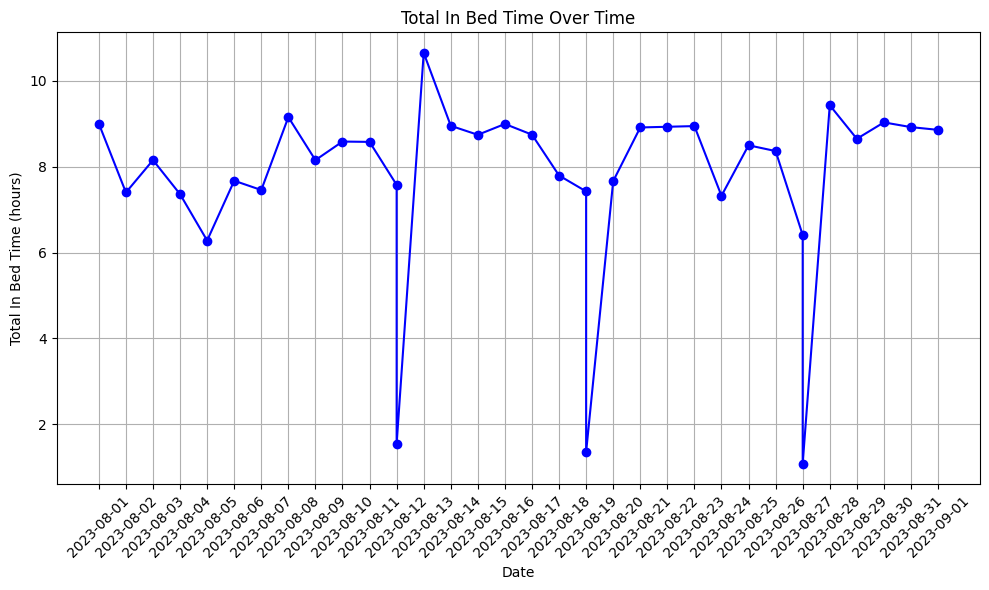

In [61]:
import matplotlib.pyplot as plt
from datetime import datetime

# Extract "start" and "end" timestamps for each sleep entry
start_times = [entry['start'] for entry in data]
end_times = [entry['end'] for entry in data]

# Convert timestamps to datetime objects
start_times = [datetime.strptime(start, '%Y-%m-%dT%H:%M:%S.%fZ') for start in start_times]
end_times = [datetime.strptime(end, '%Y-%m-%dT%H:%M:%S.%fZ') for end in end_times]

# Calculate total in bed time in hours for each sleep entry (divide by 60)
in_bed_times_hours = [(end - start).total_seconds() / 3600 for start, end in zip(start_times, end_times)]

# Create a list of corresponding date strings for the x-axis labels
dates = [start.strftime('%Y-%m-%d') for start in start_times]  # Extract YYYY-MM-DD

# Reverse the order of dates and in-bed times
dates.reverse()
in_bed_times_hours.reverse()

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(dates, in_bed_times_hours, marker='o', linestyle='-', color='b')
plt.xlabel('Date')
plt.ylabel('Total In Bed Time (hours)')
plt.title('Total In Bed Time Over Time')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()



